# Task 1 - Classification
1. Use the same dataset (Iris),but try using different features/combinations of features and test the accuracy.
2. Use cross validation to compare KNN and any other classification model of your choice. Then, use GridSearch for tuning your final model. 

# Task 2 - Regression
KNN can be used for classification and regression problems. In classification problems, KNN classifies an instance by taking the majority of votes from its neighbors. In regression problems, KNN assigns the predicted value by averaging the values of its neighbors. <br>
You should use this [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) for this task. You should do the following:
1. Do some basic data exploration (as much as you need).
2. Write down your observations and whether you needed to do any preprocessing/feature engineering.
3. Use cross validation to choose between KNN or linear regression models.
4. Compare their performance and try to justify why a model's performance is good or bad?
4. Use GridSearch CV for tuning your final model.

**Good Luck!**

#Task One

In [19]:
# Import necessary libraries
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Experiment with different combinations of features
# For example, try using only the first two features (sepal length and width)
X_subset = X[:, :2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2)

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Create a LogisticRegression object
lr = LogisticRegression()

# Use cross-validation to evaluate the performance of KNN, Decision Tree and Logistic Regression
scores_knn = cross_val_score(knn, X_train, y_train, cv=5)
scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

# Print the average accuracy for each model
print("KNN: ", scores_knn.mean())
print("Decision Tree: ", scores_dt.mean())
print("Logistic Regression: ", scores_lr.mean())

# Select the final model based on the highest accuracy from cross-validation
# For example, if KNN has the highest accuracy, use it as the final model
final_model = knn

# Use GridSearch to tune the parameters of the final model
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(final_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy from GridSearch
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

KNN:  0.7916666666666667
Decision Tree:  0.7166666666666666
Logistic Regression:  0.8
Best Parameters:  {'n_neighbors': 8, 'weights': 'uniform'}
Best Accuracy:  0.8166666666666667


#Task Two

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Checkig for nulls
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#handling numerical nulls
nulls_nums = df_train.select_dtypes(exclude = ["object"]).columns
df_nulls_nums = df_train[nulls_nums].fillna(df_train[nulls_nums].median())
#handling categorical nulls
nulls_obj= df_train.select_dtypes(include = ["object"]).columns
df_nulls_obj = pd.get_dummies(df_train[nulls_obj])
#concatenating 
copy_df_train = pd.concat([df_nulls_nums,df_nulls_obj],axis = 1)
copy_df_train.shape

(1460, 290)

In [7]:
copy_df_train.isna().sum().sum()

0

In [8]:
copy_df_train.duplicated().sum()

0

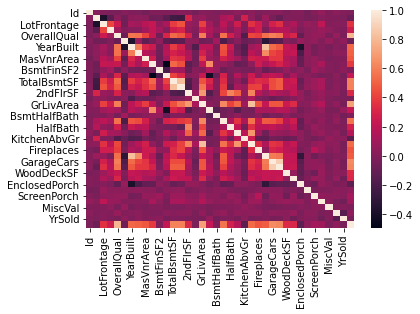

In [16]:
sns.heatmap(df_train.corr())

In [39]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
#Splitting into train and test sets

Xtrain = copy_df_train.drop('SalePrice', axis=1)
ytrain = copy_df_train['SalePrice']

Xtest= df_test
ytest= copy_df_train['SalePrice']

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Create a LogisticRegression object
lr = LogisticRegression()

# Use cross-validation to evaluate the performance of KNN, Decision Tree and Logistic Regression
scores_knn = cross_val_score(knn, Xtrain, ytrain, cv=5)
scores_dt = cross_val_score(dt, Xtrain, ytrain, cv=5)
scores_lr = cross_val_score(lr, Xtrain, ytrain, cv=5)

# Print the average accuracy for each model
print("KNN: ", scores_knn.mean())
print("Decision Tree: ", scores_dt.mean())
print("Logistic Regression: ", scores_lr.mean())

# Select the final model based on the highest accuracy from cross-validation
# For example, if KNN has the highest accuracy, use it as the final model
final_model = knn

# Use GridSearch to tune the parameters of the final model
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(final_model, param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)

# Print the best parameters and accuracy from GridSearch
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

KNN:  0.007534246575342465
Decision Tree:  0.0061643835616438354
Logistic Regression:  0.010273972602739725
Best Parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy:  0.00821917808219178
